In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [25]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [26]:
import matplotlib.pyplot as plt

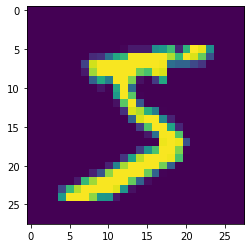

In [27]:
plt.imshow(X_train[0])

In [28]:
y_train[0]

5

In [29]:
#filter the data so it can run faster 


In [30]:
only_zeros = X_train[y_train==0]

In [31]:
only_zeros.shape

(5923, 28, 28)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape,Flatten
from tensorflow.keras.models import Sequential

In [33]:
coding_size=100
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))



In [34]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
#final output
discriminator.add(Dense(1,activation = 'sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
GAN = Sequential([generator,discriminator])


In [36]:
discriminator.trainable = False

In [37]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
batch_size=32

In [39]:
my_data = only_zeros

In [40]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)


In [41]:
dataset = dataset.batch(batch_size,drop_remainder = True).prefetch(1)

In [63]:
epochs = 100

In [43]:
GAN.layers

In [44]:
GAN.layers[0].layers

In [45]:
GAN.layers[1].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               117750    
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [64]:
generator, discriminator = GAN.layers
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185
Currently on Epoch 6
	Currently on batch number 100 of 185
Currently on Epoch 7
	Currently on batch number 100 of 185
Currently on Epoch 8
	Currently on batch number 100 of 185
Currently on Epoch 9
	Currently on batch number 100 of 185
Currently on Epoch 10
	Currently on batch number 100 of 185
Currently on Epoch 11
	Currently on batch number 100 of 185
Currently on Epoch 12
	Currently on batch number 100 of 185
Currently on Epoch 13
	Currently on batch number 100 of 185
Currently on Epoch 14
	Currently on batch number 100 of 185
Currently on Epoch 15
	Currently on batch number 100 of 185
Currently on Epoch 16
	Currently on batch number 100 of 185
Currently on Epoch 17
	Currently on batch number 

In [47]:
noise = tf.random.normal(shape=[10,coding_size])



In [48]:
noise.shape

TensorShape([10, 100])

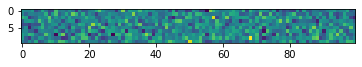

In [49]:
plt.imshow(noise)

**This is the result of the GAN trained on only 2 epochs**

In [50]:
images = generator(noise)

In [51]:
images.shape

TensorShape([10, 28, 28])

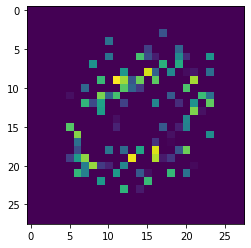

In [54]:
plt.imshow(images[8])

**This is the result after gan is trained on 30 epochs**

In [61]:
images2 = generator(noise)

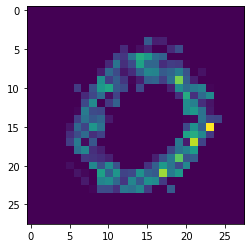

In [62]:
plt.imshow(images2[0])

**Pretty Impresive !!! I will try for 100 epochs**

In [65]:
images3=generator(noise)

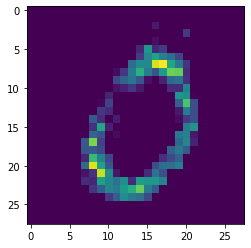

In [66]:
plt.imshow(images3[0])

**Nice !! I stop here**